In [42]:
import pandas as pd

#### Procesamiento de taxis

Para simular una carga incremental en la nube, el ultimo mes de datos no se utilizaran.

In [43]:
green_2301 = pd.read_parquet('descargas/green_tripdata_2023-01.parquet',engine='pyarrow')
green_2302 = pd.read_parquet('descargas/green_tripdata_2023-02.parquet',engine='pyarrow')
green_2303 = pd.read_parquet('descargas/green_tripdata_2023-03.parquet',engine='pyarrow')
green_2304 = pd.read_parquet('descargas/green_tripdata_2023-04.parquet',engine='pyarrow')
green_2305 = pd.read_parquet('descargas/green_tripdata_2023-05.parquet',engine='pyarrow')
green_2306 = pd.read_parquet('descargas/green_tripdata_2023-06.parquet',engine='pyarrow')
green_2307 = pd.read_parquet('descargas/green_tripdata_2023-07.parquet',engine='pyarrow')
green_2308 = pd.read_parquet('descargas/green_tripdata_2023-08.parquet',engine='pyarrow')
green_2309 = pd.read_parquet('descargas/green_tripdata_2023-09.parquet',engine='pyarrow')
green_2310 = pd.read_parquet('descargas/green_tripdata_2023-10.parquet',engine='pyarrow')
green_2311 = pd.read_parquet('descargas/green_tripdata_2023-11.parquet',engine='pyarrow')
green_2312 = pd.read_parquet('descargas/green_tripdata_2023-12.parquet',engine='pyarrow')
green_2401 = pd.read_parquet('descargas/green_tripdata_2024-01.parquet',engine='pyarrow')
green_2402 = pd.read_parquet('descargas/green_tripdata_2024-02.parquet',engine='pyarrow')
green_2403 = pd.read_parquet('descargas/green_tripdata_2024-03.parquet',engine='pyarrow')
green_2404 = pd.read_parquet('descargas/green_tripdata_2024-04.parquet',engine='pyarrow')
green_2405 = pd.read_parquet('descargas/green_tripdata_2024-05.parquet',engine='pyarrow')
green_2406 = pd.read_parquet('descargas/green_tripdata_2024-06.parquet',engine='pyarrow')
#green_2407 = pd.read_parquet('descargas/green_tripdata_2024-07.parquet',engine='pyarrow')

In [44]:
df_taxis_green = [green_2301,green_2302,green_2303,green_2304,green_2305,
               green_2306,green_2307,green_2308,green_2309,green_2310,green_2311,
               green_2312,green_2401,green_2402,green_2403,green_2404,green_2405,green_2406]
print(type(df_taxis_green))

<class 'list'>


In [45]:
# Concateamos para crear uno solo
df_taxis_green = pd.concat(df_taxis_green, ignore_index=True)
df_taxis_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126867 entries, 0 to 1126866
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1126867 non-null  int64         
 1   lpep_pickup_datetime   1126867 non-null  datetime64[us]
 2   lpep_dropoff_datetime  1126867 non-null  datetime64[us]
 3   store_and_fwd_flag     1057035 non-null  object        
 4   RatecodeID             1057035 non-null  float64       
 5   PULocationID           1126867 non-null  int64         
 6   DOLocationID           1126867 non-null  int64         
 7   passenger_count        1057035 non-null  float64       
 8   trip_distance          1126867 non-null  float64       
 9   fare_amount            1126867 non-null  float64       
 10  extra                  1126867 non-null  float64       
 11  mta_tax                1126867 non-null  float64       
 12  tip_amount             11268

1. **VendorID**: Un código que representa al proveedor de tecnología (TPEP) que proporcionó el registro del viaje.
   - `1`: Creative Mobile Technologies, LLC
   - `2`: VeriFone Inc.
2. **tpep_pickup_datetime**: Fecha y hora en que se inició el viaje (se activó el taxímetro).
3. **tpep_dropoff_datetime**: Fecha y hora en que finalizó el viaje (se desactivó el taxímetro).
4. **Passenger_count**: Cantidad de pasajeros reportados para el viaje. Este dato es ingresado manualmente por el conductor.
5. **Trip_distance**: Distancia recorrida durante el viaje, reportada en millas.
6. **PULocationID**: ID de la zona de taxi TLC donde comenzó el viaje.
7. **DOLocationID**: ID de la zona de taxi TLC donde terminó el viaje.
8. **RateCodeID**: Código de la tarifa aplicada para el viaje.
   - `1`: Tarifa estándar
   - `2`: JFK
   - `3`: Newark
   - `4`: Nassau o Westchester
   - `5`: Tarifa negociada
   - `6`: Viaje en grupo
9. **Store_and_fwd_flag**: Indica si el registro del viaje fue almacenado temporalmente en la memoria del vehículo debido a problemas de conectividad.
   - `Y`: Sí, almacenado y enviado más tarde
   - `N`: No, enviado en tiempo real
10. **Payment_type**: Método de pago utilizado.
    - `1`: Tarjeta de crédito
    - `2`: Efectivo
    - `3`: Sin cargo
    - `4`: Disputa
    - `5`: Desconocido
    - `6`: Viaje anulado
11. **Fare_amount**: Monto de la tarifa calculada en base al tiempo y distancia por el taxímetro.
12. **Extra**: Cargos adicionales (como cargos por hora pico o nocturnos).
13. **MTA_tax**: Un impuesto de $0.50 para la Autoridad Metropolitana de Transporte (MTA).
14. **Improvement_surcharge**: Un recargo de $0.30 que se aplica desde 2015.
15. **Tip_amount**: Propinas recibidas, automáticamente registradas para pagos con tarjeta de crédito (las propinas en efectivo no se incluyen).
16. **Tolls_amount**: Total de peajes pagados durante el viaje.
17. **Total_amount**: El total del viaje, excluyendo las propinas en efectivo.
18. **Congestion_Surcharge**: Recargo por congestión recolectado para el programa de tarifas de congestión del Estado de Nueva York.
19. **Airport_fee**: Un recargo de $1.25 para recogidas en los aeropuertos LaGuardia y JFK.

In [46]:
df_taxis_green.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag         69832
RatecodeID                 69832
PULocationID                   0
DOLocationID                   0
passenger_count            69832
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1126867
improvement_surcharge          0
total_amount                   0
payment_type               69832
trip_type                  69926
congestion_surcharge       69832
dtype: int64

#### Para lograr los objetivos de la empresa, se decidieron utilizar solamente las columnas de:

- pickup_datetime
- dropoff_datetime
- PULocationID      
- DOLocationID      
- passenger_count
- trip_distance
- tip_amount
- amount


In [47]:
drop_cols = ['store_and_fwd_flag', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                    'ehail_fee', 'congestion_surcharge', 'trip_type', 'VendorID', 'RatecodeID', 'payment_type']

# Eliminamos las columnas de la lista
df_taxis_green.drop(columns=drop_cols, inplace=True)
# Renombramos las columnas
df_taxis_green.rename(columns={'lpep_pickup_datetime': 'pickup_datetime','lpep_dropoff_datetime': 'dropoff_datetime',
                            'total_amount': 'amount'}, inplace=True)
df_taxis_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126867 entries, 0 to 1126866
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   pickup_datetime   1126867 non-null  datetime64[us]
 1   dropoff_datetime  1126867 non-null  datetime64[us]
 2   PULocationID      1126867 non-null  int64         
 3   DOLocationID      1126867 non-null  int64         
 4   passenger_count   1057035 non-null  float64       
 5   trip_distance     1126867 non-null  float64       
 6   tip_amount        1126867 non-null  float64       
 7   amount            1126867 non-null  float64       
dtypes: datetime64[us](2), float64(4), int64(2)
memory usage: 68.8 MB


Las columnas de tip_amount y amount, se sumaran para tener una variable donde exprese la cantidad total del dinero que gasto el cliente.

In [48]:
# Sumamos las columnas amount y tip_amount para crear la columna total_price
df_taxis_green['total_price'] = df_taxis_green['amount'] + df_taxis_green['tip_amount']
df_taxis_green.drop(columns=['amount', 'tip_amount'], inplace=True)

Debido a que las columnas con cantidad de pasajeros y distancia del viaje pueden llegar a ser 0, se procedio a eliminar las filas que posean 0 en estas columnas.

In [49]:
print(df_taxis_green['passenger_count'].value_counts(),df_taxis_green['trip_distance'].value_counts())


passenger_count
1.0    891297
2.0     94581
5.0     27804
6.0     15144
3.0     13620
0.0      9260
4.0      5190
7.0        57
9.0        43
8.0        39
Name: count, dtype: int64 trip_distance
0.00        57261
1.40        10015
1.30         9529
1.20         8453
1.50         8092
            ...  
62.55           1
58.74           1
44.51           1
107.97          1
33967.47        1
Name: count, Length: 4283, dtype: int64


In [50]:
df_taxis_green = df_taxis_green[df_taxis_green['passenger_count'] != 0.0]
df_taxis_green = df_taxis_green[df_taxis_green['trip_distance'] != 0.0]

In [51]:
# Verificamos nulos
print(df_taxis_green['passenger_count'].isnull().sum())
# Debido a que sabemos que se efectuo el pago, completamos los valores nulos de la columna passenger_count con el valor 1.
df_taxis_green['passenger_count'].fillna(1, inplace=True)
df_taxis_green['passenger_count'].isnull().sum()

67546


0

#### Creacion de la columna "service" que sera booleana siendo 1 = "green" y 0 = "yellow"

In [52]:
df_taxis_green['service'] = 1
df_taxis_green.tail(2)

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_price,service
1126864,2024-06-30 19:39:00,2024-06-30 20:00:00,247,151,1.0,3.34,35.93,1
1126866,2024-06-30 22:10:00,2024-06-30 22:40:00,61,112,1.0,5.14,39.70,1


#### **Yellow Taxis**

In [53]:
yellow_2301 = pd.read_parquet('descargas/yellow_tripdata_2023-01.parquet',engine='pyarrow')
yellow_2302 = pd.read_parquet('descargas/yellow_tripdata_2023-02.parquet',engine='pyarrow')
yellow_2303 = pd.read_parquet('descargas/yellow_tripdata_2023-03.parquet',engine='pyarrow')
yellow_2304 = pd.read_parquet('descargas/yellow_tripdata_2023-04.parquet',engine='pyarrow')
yellow_2305 = pd.read_parquet('descargas/yellow_tripdata_2023-05.parquet',engine='pyarrow')
yellow_2306 = pd.read_parquet('descargas/yellow_tripdata_2023-06.parquet',engine='pyarrow')
yellow_2307 = pd.read_parquet('descargas/yellow_tripdata_2023-07.parquet',engine='pyarrow')
yellow_2308 = pd.read_parquet('descargas/yellow_tripdata_2023-08.parquet',engine='pyarrow')
yellow_2309 = pd.read_parquet('descargas/yellow_tripdata_2023-09.parquet',engine='pyarrow')
yellow_2310 = pd.read_parquet('descargas/yellow_tripdata_2023-10.parquet',engine='pyarrow')
yellow_2311 = pd.read_parquet('descargas/yellow_tripdata_2023-11.parquet',engine='pyarrow')
yellow_2312 = pd.read_parquet('descargas/yellow_tripdata_2023-12.parquet',engine='pyarrow')
yellow_2401 = pd.read_parquet('descargas/yellow_tripdata_2024-01.parquet',engine='pyarrow')
yellow_2402 = pd.read_parquet('descargas/yellow_tripdata_2024-02.parquet',engine='pyarrow')
yellow_2403 = pd.read_parquet('descargas/yellow_tripdata_2024-03.parquet',engine='pyarrow')
yellow_2404 = pd.read_parquet('descargas/yellow_tripdata_2024-04.parquet',engine='pyarrow')
yellow_2405 = pd.read_parquet('descargas/yellow_tripdata_2024-05.parquet',engine='pyarrow')
yellow_2406 = pd.read_parquet('descargas/yellow_tripdata_2024-06.parquet',engine='pyarrow')
#green_2407 = pd.read_parquet('descargas/yellow_tripdata_2024-07.parquet',engine='pyarrow')

In [54]:
df_taxis_yellow = [yellow_2301,yellow_2302,yellow_2303,yellow_2304,yellow_2305,yellow_2306,
                   yellow_2307,yellow_2308,yellow_2309,yellow_2310,yellow_2311,yellow_2312,
                   yellow_2401,yellow_2402,yellow_2403,yellow_2404,yellow_2405,yellow_2406]
print(type(df_taxis_yellow))

df_taxis_yellow = pd.concat(df_taxis_yellow, ignore_index=True)
df_taxis_yellow.info()

print(df_taxis_yellow.isna().sum())

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58642319 entries, 0 to 58642318
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airpo

In [55]:
drop_cols = ['store_and_fwd_flag', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                    'congestion_surcharge', 'VendorID', 'RatecodeID', 'payment_type','airport_fee','Airport_fee']

# Eliminamos las columnas de la lista
df_taxis_yellow.drop(columns=drop_cols, inplace=True)

# Renombramos las columnas
df_taxis_yellow.rename(columns={'tpep_pickup_datetime': 'pickup_datetime','tpep_dropoff_datetime': 'dropoff_datetime',
                            'total_amount': 'amount'}, inplace=True)
df_taxis_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58642319 entries, 0 to 58642318
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   tip_amount        float64       
 7   amount            float64       
dtypes: datetime64[us](2), float64(4), int64(2)
memory usage: 3.5 GB


- pickup_datetime
- dropoff_datetime
- PULocationID      
- DOLocationID      
- passenger_count
- trip_distance
- tip_amount
- amount

In [56]:
# Sumamos las columnas amount y tip_amount para crear la columna total_price
df_taxis_yellow['total_price'] = df_taxis_yellow['amount'] + df_taxis_yellow['tip_amount']
df_taxis_yellow.drop(columns=['amount', 'tip_amount'], inplace=True)

In [57]:
df_taxis_yellow = df_taxis_yellow[df_taxis_yellow['passenger_count'] != 0.0]
df_taxis_yellow = df_taxis_yellow[df_taxis_yellow['trip_distance'] != 0.0]

In [58]:
# Verificamos nulos
print(df_taxis_yellow['passenger_count'].isnull().sum())
# Debido a que sabemos que se efectuo el pago, completamos los valores nulos de la columna passenger_count con el valor 1.
df_taxis_yellow['passenger_count'].fillna(1, inplace=True)
df_taxis_yellow['passenger_count'].isnull().sum()

2869727


0

In [59]:
df_taxis_yellow['service'] = 0
df_taxis_yellow.tail(2)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_price,service
58642317,2024-06-30 23:33:36,2024-06-30 23:42:37,1.0,1.60,158,231,18.41,0
58642318,2024-06-30 23:04:50,2024-06-30 23:11:15,1.0,1.28,158,186,16.40,0


In [60]:
df_taxis_yellow.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'total_price',
       'service'],
      dtype='object')

In [61]:
new_order = ['pickup_datetime', 'dropoff_datetime', 'passenger_count',
             'trip_distance', 'PULocationID', 'DOLocationID','total_price','service']
df_taxis_green = df_taxis_green.reindex(columns=new_order)

In [62]:
# Concatenamos los DataFrames de yellow y green taxis
taxis = pd.concat([df_taxis_yellow, df_taxis_green], ignore_index=True)
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57785408 entries, 0 to 57785407
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   total_price       float64       
 7   service           int64         
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 3.4 GB


In [63]:
taxis.pickup_datetime.min()

Timestamp('2001-01-01 00:06:49')

In [64]:
taxis.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'total_price',
       'service'],
      dtype='object')

In [65]:
taxis = taxis.sort_values(by='pickup_datetime')

In [66]:
taxis.head(2)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_price,service
7022616,2001-01-01 00:06:49,2001-01-01 15:42:11,2.0,7.41,161,231,53.9,0
12041332,2001-01-01 00:07:36,2001-01-01 00:16:31,1.0,1.68,239,43,14.7,0


Debido a la existencia de algunos datos que su fecha no corresponde con los años extraidos, se procedera a aplicar una mascara para su filtrado.

In [67]:
print(taxis.shape)
taxis = taxis[(taxis['pickup_datetime'].dt.year == 2023) | (taxis['pickup_datetime'].dt.year == 2024)]
print(taxis.shape)

(57785408, 8)
(57785287, 8)


In [68]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57785287 entries, 2906736 to 56322147
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   total_price       float64       
 7   service           int64         
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 3.9 GB


In [69]:
# Extraer año, trimestre, mes, día del mes, día de la semana y hora
#taxis['year'] = taxis['pickup_datetime'].dt.year
#taxis['quarter'] = taxis['pickup_datetime'].dt.quarter
#taxis['month'] = taxis['pickup_datetime'].dt.month
#taxis['day_month'] = taxis['pickup_datetime'].dt.day
#taxis['weekday'] = taxis['pickup_datetime'].dt.day_name()
#taxis['hour'] = taxis['pickup_datetime'].dt.hour
#taxis.drop(columns=['pickup_datetime','dropoff_datetime'],inplace=True)

In [70]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57785287 entries, 2906736 to 56322147
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   total_price       float64       
 7   service           int64         
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 3.9 GB


In [71]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57785287 entries, 2906736 to 56322147
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   total_price       float64       
 7   service           int64         
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 3.9 GB


In [74]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57785287 entries, 2906736 to 56322147
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   passenger_count    float64
 1   trip_distance      float64
 2   PULocationID       int64  
 3   DOLocationID       int64  
 4   total_price        float64
 5   service            int64  
 6   pickup_timestamp   int64  
 7   dropoff_timestamp  int64  
dtypes: float64(3), int64(5)
memory usage: 3.9 GB


In [75]:
taxis.to_parquet('Data\process_taxis.parquet',engine='pyarrow')

In [76]:
del taxis
del df_taxis_green
del df_taxis_yellow

#### Fuel data

In [34]:
df_electric = pd.read_csv('descargas/Fuel_rate/my2012-2024-battery-electric-vehicles.csv')
df_hybrid = pd.read_csv('descargas/Fuel_rate/my2012-2024-plug-in-hybrid-electric-vehicles.csv')
df_combustion = pd.read_csv('descargas/Fuel_rate/my2024-fuel-consumption-ratings.csv', encoding='latin-1')

In [35]:
df_electric.sample(2)

,Model year,Make,Model,Vehicle class,Motor (kW),Transmission,Fuel type,City (kWh/100 km),Highway (kWh/100 km),Combined (kWh/100 km),City (Le/100 km),Highway (Le/100 km),Combined (Le/100 km),Range (km),CO2 emissions (g/km),CO2 rating,Smog rating,Recharge time (h)
199,2021,Nissan,LEAF SV/SL PLUS,Mid-size,160,A1,B,18.3,22.1,20.0,2.1,2.5,2.2,349,0,10.0,10.0,11.0
249,2022,Ford,Mustang Mach-E Standard Range,Sport utility vehicle: Small,198,A1,B,19.0,21.9,20.3,2.1,2.5,2.3,397,0,10.0,10.0,8.1


In [36]:
df = pd.read_parquet('Data\process_taxis.parquet',engine='pyarrow')

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df.sample(20)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_price,service
28819687,2023-10-11 15:42:18,2023-10-11 16:01:11,1.0,0.07,229,234,27.70,0
29409113,2023-10-16 19:19:58,2023-10-16 19:40:47,1.0,3.60,161,231,35.80,0
53015615,2024-05-20 11:46:07,2024-05-20 12:39:51,1.0,11.90,138,230,109.33,0
1603998,2023-01-17 23:59:40,2023-01-18 00:16:02,1.0,4.31,230,151,40.34,0
27094235,2023-09-25 12:45:36,2023-09-25 12:49:53,1.0,0.50,236,237,10.50,0
29099548,2023-10-13 21:19:57,2023-10-13 21:24:45,1.0,0.71,166,151,12.60,0
28660377,2023-10-10 07:03:08,2023-10-10 07:06:23,1.0,0.76,237,236,9.80,0
44971649,2024-03-13 13:45:28,2024-03-13 14:10:57,1.0,6.10,230,152,48.24,0
9976492,2023-04-07 14:53:28,2023-04-07 14:57:44,1.0,0.90,263,236,15.70,0
3602318,2023-02-06 16:30:03,2023-02-06 16:37:07,1.0,0.14,140,140,14.40,0


In [39]:
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
# df without outliers
df_withoutliers = df[~((df['trip_distance'] < (Q1 - 1.5 * IQR)) | (df['trip_distance'] > (Q3 + 1.5 * IQR)))]

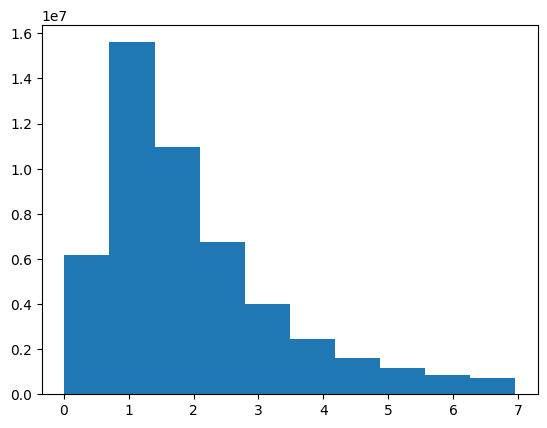

In [40]:
# Crear el histograma
plt.hist(df_withoutliers['trip_distance'])
plt.show()